In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

      hostname       os   enviroment  country  node
0     ATESP001      AIX      Testing    Spain     1
1     LTESP001    Linux      Testing    Spain     1
2     APIRL001      AIX   Production  Ireland     1
3     LDIRL001    Linux  Development  Ireland     1
4     SPFRA001  Solaris   Production   France     1
...        ...      ...          ...      ...   ...
1495  SPNOR010  Solaris   Production   Norway    10
1496  STFRA010  Solaris      Testing   France    10
1497  APIRL030      AIX   Production  Ireland    30
1498  ASIRL029      AIX      Staging  Ireland    29
1499  LSESP025    Linux      Staging    Spain    25

[1500 rows x 5 columns]


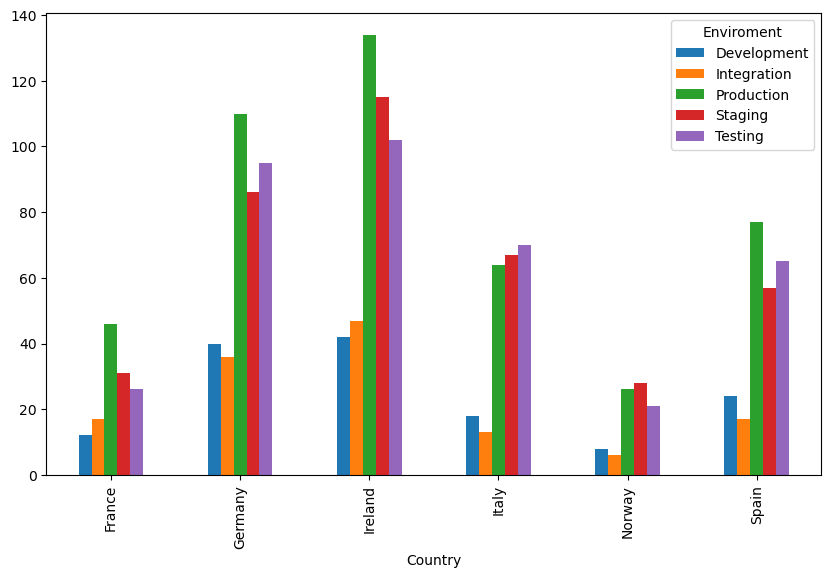

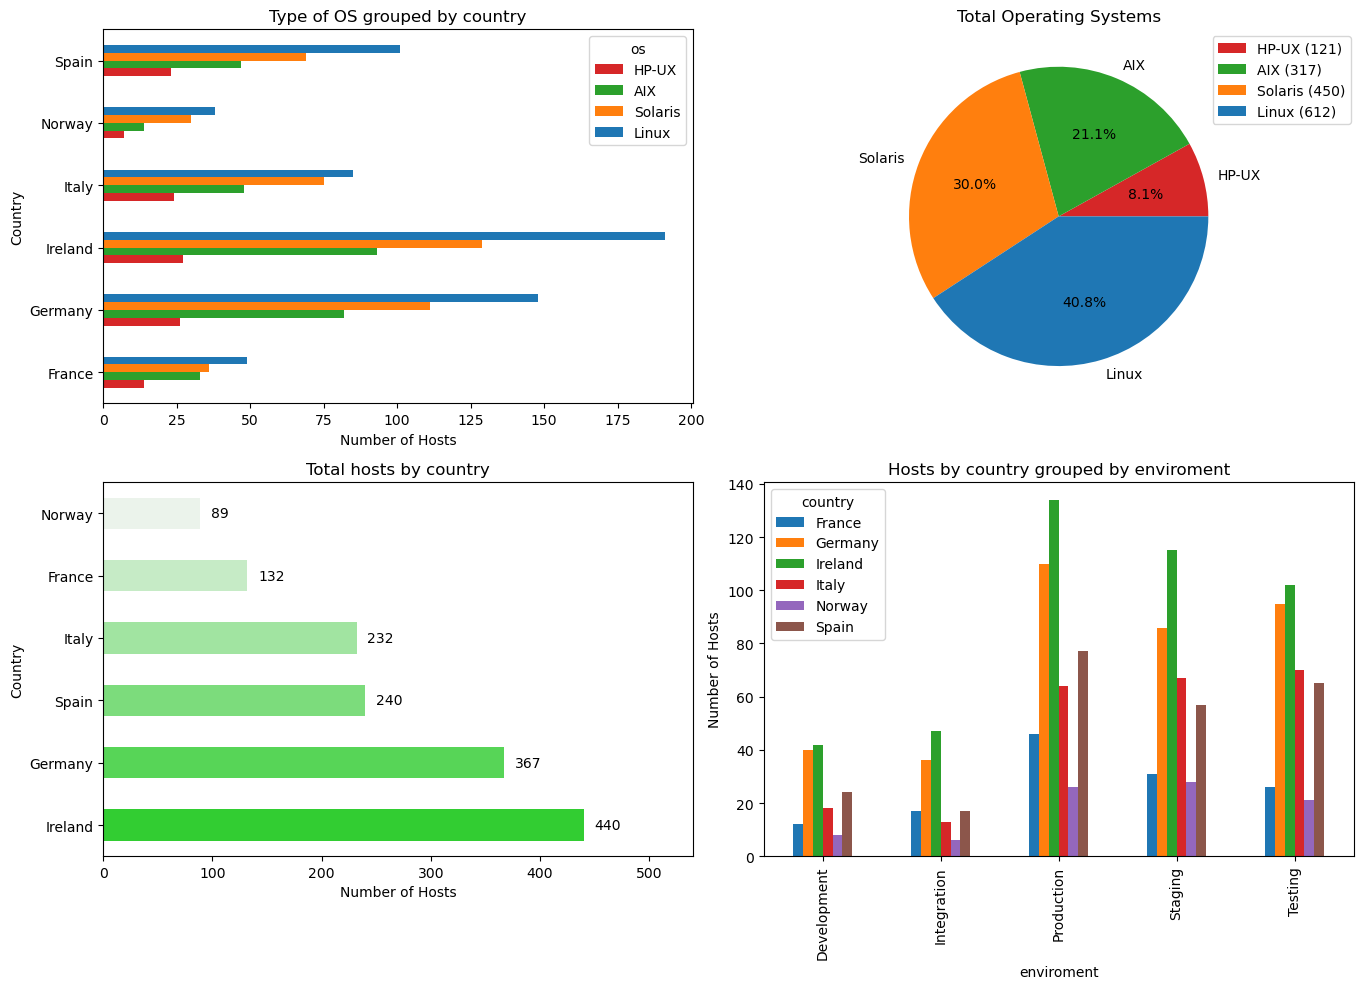

In [108]:
# Función para generar nombres de hosts

def set_hostnames(number_of_hosts: int) -> None:
    hostnames = []

    os = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    paises = ['NOR']*6 + ['FRA']*9 +['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha = {}
    
    for i in range(number_of_hosts):
        
        alpha = random.choice(os) + random.choice(entorno) + random.choice(paises)
        
        if alpha not in grupo_alpha:
            grupo_alpha[alpha] = 1
        else:
            grupo_alpha[alpha] += 1
        numero_alpha = str(grupo_alpha[alpha]).zfill(3)
        
        hostname= alpha + numero_alpha
        hostnames.append(hostname)
    return hostnames    

# Funciones para obtener información de los nombres de hosts

def get_os(hostname: str) -> str:
    
    osl= hostname[0]
    os_mapping = {'L': 'Linux', 'S': 'Solaris', 'A': 'AIX', 'H': 'HP-UX'}
    return os_mapping.get(osl, 'Unknown')

def get_environment(hostname: str) -> str: 
    if len(hostname) >= 2:
        el = hostname[1]
        e_mapping = {'D': 'Development', 'I': 'Integration', 'T': 'Testing', 'S': 'Staging', 'P': 'Production'}
        return e_mapping.get(el, 'Unknown')
    else:
        return 'Unknown'
    
def get_country(hostname: str) -> str:

    if len(hostname) >= 5:
        cl = hostname[2:5]
        c_mapping = {
            'NOR': 'Norway',
            'DEU': 'Germany',
            'ITA': 'Italy',
            'ESP': 'Spain',
            'IRL': 'Ireland',
            'FRA': 'France'
        }
        return c_mapping.get(cl, 'Unknown')
    else:
        return 'Unknown'
    
df = None

# Función para crear el DataFrame

def set_dataframe(count: int) ->None:
    global df 
    
    hostnames=set_hostnames(count)
    
    dataset = []
    
    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'enviroment' : get_environment(hostname),
            'country' : get_country(hostname),
            'node': int(hostname[5:])
        })
    
    df = pd.DataFrame(dataset)

# Crear el DataFrame
    
set_dataframe(1500)        

# Escribir el DataFrame en un archivo CSV

df.to_csv('hosts.csv', header=True, index=False)

# Leer el DataFrame desde el archivo CSV

hosts_df = pd.read_csv('hosts.csv')

# Imprimir el DataFrame

print(hosts_df)


# Visualización de datos

grouped_data = hosts_df.groupby(['country', 'enviroment']).size().reset_index(name='count')

pivot_data = grouped_data.pivot(index='country', columns='enviroment', values='count').fillna(0)
ax = pivot_data.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Country')
plt.legend(title='Enviroment', loc='upper right')

plt.show()

# Establecer la paleta de colores para la visualización de datos

sns.set_palette("tab10")

# Crear un diccionario de colores para los sistemas operativos

os_colors = {'Linux': sns.color_palette("tab10")[0],
             'Solaris': sns.color_palette("tab10")[1],
             'AIX': sns.color_palette("tab10")[2],
             'HP-UX' : sns.color_palette("tab10")[3] }

# Creación subtramas para visualizaciones múltiples

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Ordenar los sistemas operativos para que aparezcan en el mismo orden en ambos gráficos

os_order = ['HP-UX', 'AIX', 'Solaris', 'Linux']

# Visualización de tipos de sistemas operativos por país

ax1 = axes[0, 0]
os_by_country = hosts_df.groupby(['country', 'os']).size().unstack().reindex(columns=os_order)
os_by_country.plot(kind='barh', ax=ax1, color=[os_colors.get(os, 'gray') for os in os_by_country.columns])
ax1.set_ylabel('Country')
ax1.set_xlabel('Number of Hosts')
ax1.set_title('Type of OS grouped by country')

# Visualización del total de sistemas operativos

ax2 = axes[0, 1]
total_os = hosts_df['os'].value_counts().reindex(index=os_order)
pie_chart = total_os.plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=[os_colors.get(os, 'gray') for os in total_os.index])
legend_labels = [f'{label} ({count})' for label, count in zip(total_os.index, total_os)]
ax2.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))
ax2.set_ylabel('')
ax2.set_title('Total Operating Systems')

# Visualización del total de hosts por país

ax3 = axes[1, 0]
total_hosts_by_country = hosts_df['country'].value_counts()
green_palette = sns.light_palette("limegreen", as_cmap=True, reverse=True)
colors = green_palette(np.linspace(0, 1, len(total_hosts_by_country)))
total_hosts_by_country.plot(kind='barh', ax=ax3, color=colors)
ax3.set_xlabel('Number of Hosts')
ax3.set_ylabel('Country')
ax3.set_xlim(0, total_hosts_by_country.max() + 100)
ax3.set_title('Total hosts by country')

# Agregar etiquetas de valores en las barras

for i, v in enumerate(total_hosts_by_country):
    ax3.text(v + 10, i, str(v), ha='left', va='center') 

# Visualización de hosts por país agrupados por entorno

ax4 = axes[1, 1]
hosts_by_country_env = hosts_df.groupby(['country', 'enviroment']).size().unstack(0)
hosts_by_country_env.plot(kind='bar', ax=ax4)
ax4.set_ylabel('Number of Hosts')
ax4.set_title('Hosts by country grouped by enviroment')

fig.tight_layout()

plt.show()
